# Lending Loan Case Study

### When a person applies for a loan, there are two types of decisions that could be taken by the company:

#### Loan accepted:
    If the company approves the loan, there are 3 possible scenarios described below:

#### Fully paid: 
    Applicant has fully paid the loan (the principal and the interest rate)

#### Current: 
    Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

#### Charged-off: 
    Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

#### Loan rejected: 
    
    The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


## Buisness Objective

#### We should be able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss.  or understand the driving factors (or driver variables) behind loan defaults


In [3]:
# importing required libraries
#import the libraries
import pandas as pd
import numpy as np

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
# read the loan dataset and check the first five rows
loanInfo = pd.read_csv("loan.csv")
loanInfo.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [74]:
# View the current shape of DataFrame
loanInfo.shape

(39717, 111)

## Cleaning the Data Set

##### Identify the columns which are having Nan or same element in all the rows  then Drop columns


In [65]:
# Check the number of null values in the columns
loanInfo.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [66]:
# Drop the columns which are having most null values
# column which is have considerable number of nan
max_nan = 25682

loanInfo1 = loanInfo.drop(loanInfo.columns[loanInfo.apply(lambda col: col.isnull().sum() >= max_nan)], axis=1)

loanInfo1.shape


(39717, 54)

In [168]:

loanInfo2 = loanInfo1.drop(loanInfo1.columns[loanInfo1.apply(lambda col: (col==0).sum() >= max_nan)], axis=1)
loanInfo2.shape

(39717, 41)

In [169]:
loanInfo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  object 
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   sub_grade            39717 non-null  object 
 10  emp_title            37258 non-null  object 
 11  emp_length           38642 non-null  object 
 12  home_ownership       39717 non-null  object 
 13  annual_inc           39717 non-null  float64
 14  verification_status  39717 non-null  object 
 15  issue_d              39717 non-null 

In [170]:
loanInfo2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,f,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,May-16,1,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,f,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,Sep-13,1,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,f,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,May-16,1,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,f,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,Apr-16,1,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,f,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,May-16,1,INDIVIDUAL


### Based on the above informaiton finding the counts of some of repated variable  to decide to drop or not

In [171]:
loanInfo2.pymnt_plan.value_counts()

n    39717
Name: pymnt_plan, dtype: int64

In [172]:
loanInfo2.initial_list_status.value_counts()

f    39717
Name: initial_list_status, dtype: int64

In [173]:

loanInfo2.policy_code.value_counts()

1    39717
Name: policy_code, dtype: int64

In [174]:
loanInfo2.drop(['pymnt_plan','initial_list_status','policy_code'], axis=1, inplace=True)  


## Remove the columns which are not userfull for Analysis

#####  Colums  id , member_id , emp_title, url, application_type , desc


In [175]:
# URL not impact any of data so dropping the column and application_type is alaways INDIVIDUAL so Drop them too
loanInfo2.drop(['id','member_id','emp_title','url','desc','application_type'], axis=1, inplace=True)  


In [176]:
loanInfo2.shape

(39717, 32)

In [177]:
loanInfo2.columns


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'],
      dtype='object')

## Remove the rows which are more currently running loan

In [178]:
loanInfo2 = loanInfo2[loanInfo2.loan_status != "Current"]
loanInfo2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,13648,83.70%,9,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,May-16
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1687,9.40%,4,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,Sep-13
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,2956,98.50%,10,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,May-16
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,Apr-16
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,...,7963,28.30%,12,5632.210000,5632.21,5000.00,632.21,Jan-15,161.03,Jan-16


## Finding missing values % and filing the value


In [179]:
(loanInfo2.isna().sum()/len(loanInfo2.index))*100


loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
title                  0.028514
zip_code               0.000000
addr_state             0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
revol_bal              0.000000
revol_util             0.129611
total_acc              0.000000
total_pymnt            0.000000
total_pymnt_inv        0.000000
total_rec_prncp        0.000000
total_rec_int          0.000000
last_pymnt_d           0.184047
last_pymnt_amnt        0.000000
last_cre

In [180]:
# As emp_length has most missing values , finding common Employment length and add in missing values
commonVal = loanInfo2.emp_length.mode()[0]

In [181]:
loanInfo2.emp_length.fillna(commonVal, inplace = True)


In [182]:
loanInfo2.emp_length.isna().sum()

0

In [183]:
loanInfo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           38577 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  title                38566 non-null 

## Standardizing the data

### int_rate, emp_length revol_util  can be converted as Numeric for futher analysis 


In [189]:
#abc = "83.72%"
#x = pd.to_numeric(abc[:-1])
#x
loanInfo2.int_rate = pd.to_numeric(loanInfo2.int_rate.replace("%","", regex=True))
loanInfo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  float64
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           38577 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  title                38566 non-null 

In [244]:
loanInfo2.emp_length = pd.to_numeric(loanInfo2.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))
loanInfo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34832 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            34832 non-null  int64  
 1   funded_amnt          34832 non-null  int64  
 2   funded_amnt_inv      34832 non-null  float64
 3   term                 34832 non-null  object 
 4   int_rate             34832 non-null  float64
 5   installment          34832 non-null  float64
 6   grade                34832 non-null  object 
 7   sub_grade            34832 non-null  object 
 8   emp_length           34832 non-null  int64  
 9   home_ownership       34832 non-null  object 
 10  annual_inc           34832 non-null  float64
 11  verification_status  34832 non-null  object 
 12  issue_d              34832 non-null  object 
 13  loan_status          34832 non-null  object 
 14  purpose              34832 non-null  object 
 15  title                34821 non-null 

In [190]:
loanInfo2.revol_util = pd.to_numeric(loanInfo2.revol_util.replace("%","", regex=True))
loanInfo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  float64
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           38577 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  title                38566 non-null 

## Adding derived columns for date


In [238]:
## Extracting month and year
m_y = loanInfo2['issue_d'].str.partition("-", True)     
loanInfo2['loan_month']=m_y[0]                       
loanInfo2['loan_year']='20' + m_y[2]

## Remove Out layers before analysis


In [194]:
# Import some more required libraries
import matplotlib.pyplot as plt
import seaborn as sns

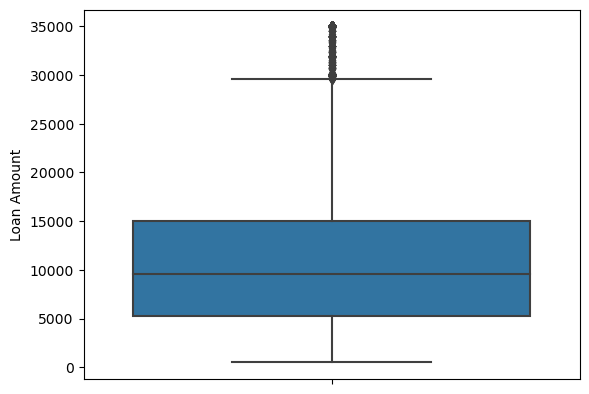

In [198]:
#sns.boxplot( loanInfo2["loan_amnt"] )

sns.boxplot( y=loanInfo2["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

###  The loan amount varies between 0 to 35,000 and  mean is 10,000


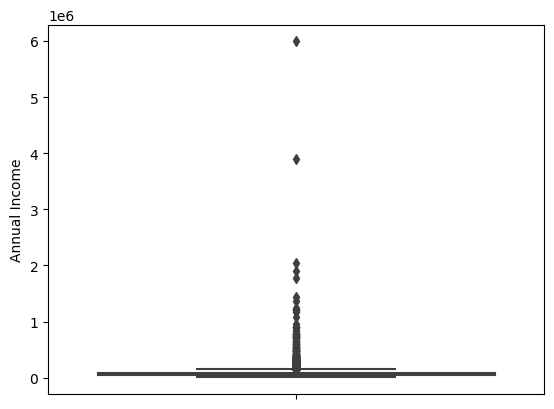

In [200]:
sns.boxplot( y=loanInfo2["annual_inc"] )
plt.ylabel('Annual Income')
plt.show()

In [202]:
# As there are many outlier , see Quantail information 
quantile_ainc = loanInfo2.annual_inc.quantile([0.5, 0.70, 0.80, 0.90, 0.95, 0.97,0.98, 0.99])
quantile_ainc

0.50     58868.0
0.70     75000.0
0.80     90000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

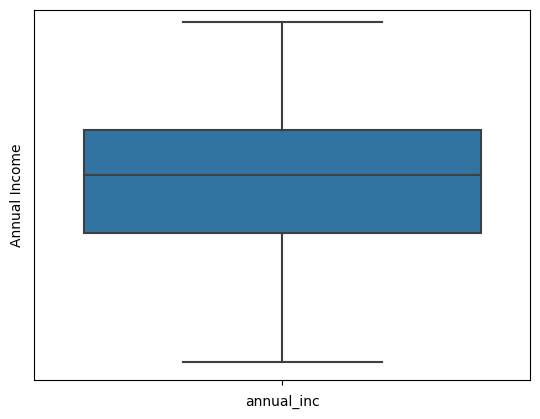

In [204]:
# Flitering  up to 95 qunatail  data
quantile_ainc95 = loanInfo2['annual_inc'].quantile(0.95)
loanInfo2 = loanInfo2[loanInfo2.annual_inc <= quantile_ainc95]

sns.boxplot( y=loanInfo2["annual_inc"] )
plt.ylabel('Annual Income')
plt.show()

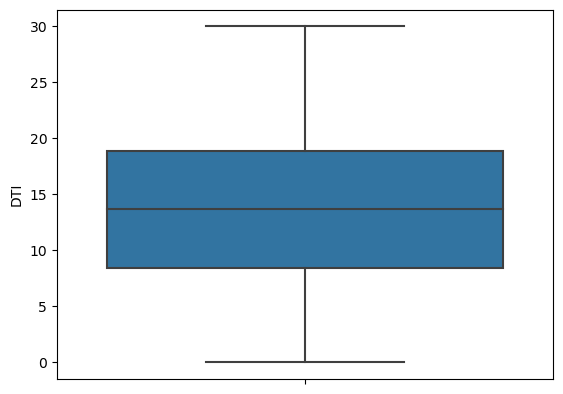

In [206]:
sns.boxplot( y=loanInfo2["dti"] )
plt.ylabel('DTI')
plt.show()

## Categorical Data

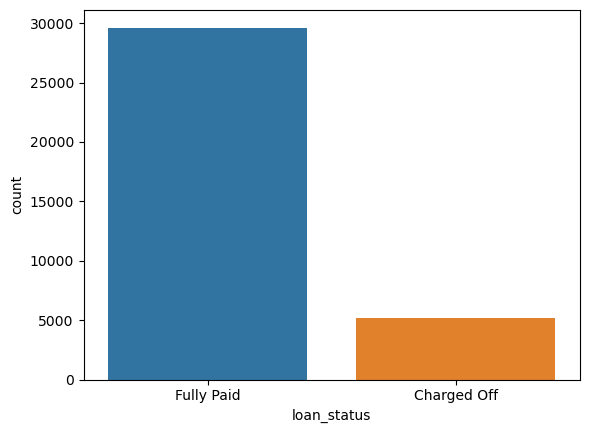

In [207]:
sns.countplot(x= loanInfo2["loan_status"])
plt.show()

In [208]:
loanInfo2["loan_status"].value_counts()


Fully Paid     29624
Charged Off     5208
Name: loan_status, dtype: int64

Around 14% of loan are having status as Charged off (defaulters) Remaining most loans are Paid


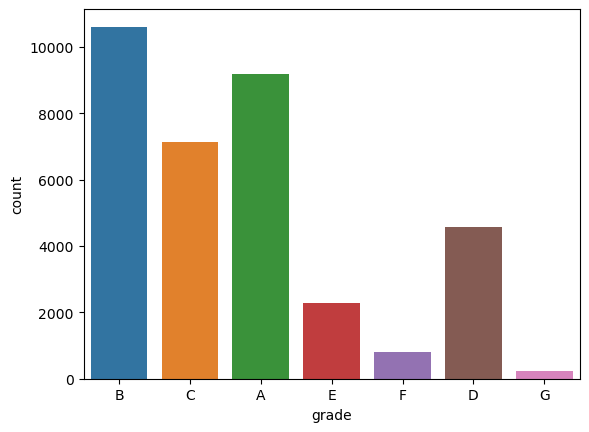

In [214]:
sns.countplot(x='grade', data=loanInfo2)
plt.show()

### Most of the loans are from A, B and C

In [216]:
loanInfo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34832 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            34832 non-null  int64  
 1   funded_amnt          34832 non-null  int64  
 2   funded_amnt_inv      34832 non-null  float64
 3   term                 34832 non-null  object 
 4   int_rate             34832 non-null  float64
 5   installment          34832 non-null  float64
 6   grade                34832 non-null  object 
 7   sub_grade            34832 non-null  object 
 8   emp_length           34832 non-null  object 
 9   home_ownership       34832 non-null  object 
 10  annual_inc           34832 non-null  float64
 11  verification_status  34832 non-null  object 
 12  issue_d              34832 non-null  object 
 13  loan_status          34832 non-null  object 
 14  purpose              34832 non-null  object 
 15  title                34821 non-null 

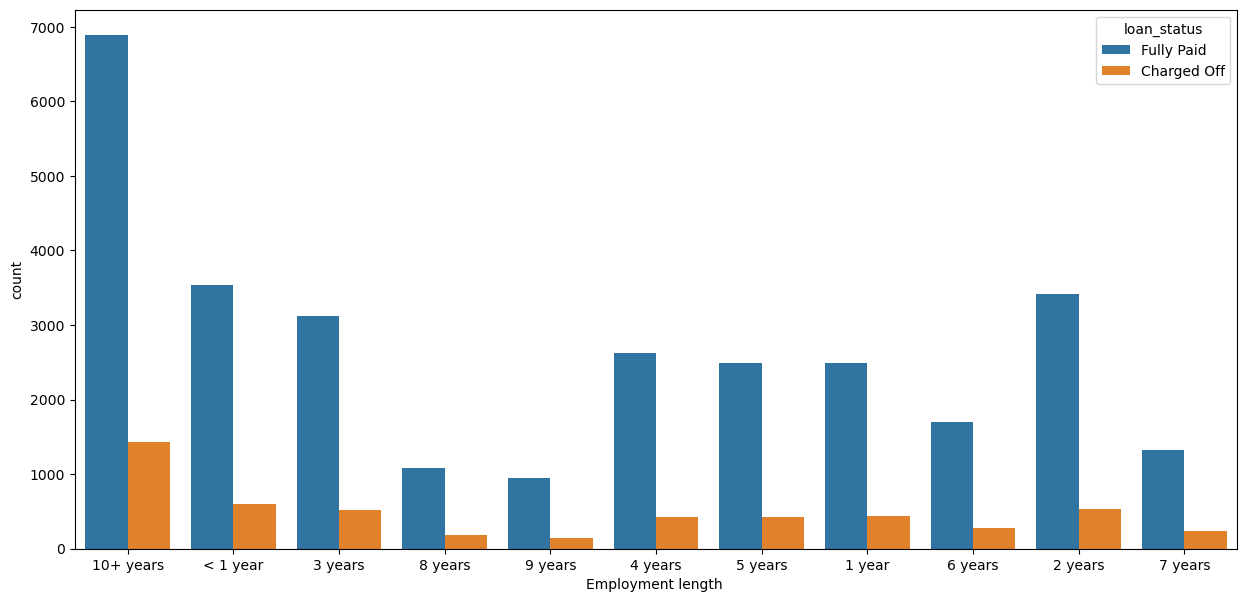

In [218]:
plt.figure(figsize=[15,7])

sns.countplot(x='emp_length', hue='loan_status', data=loanInfo2)
plt.xlabel('Employment length ')
plt.show()

### Most of the loans taken by 10+ of exp employee , highly paid by the same

## Segmented Univariate Analysis


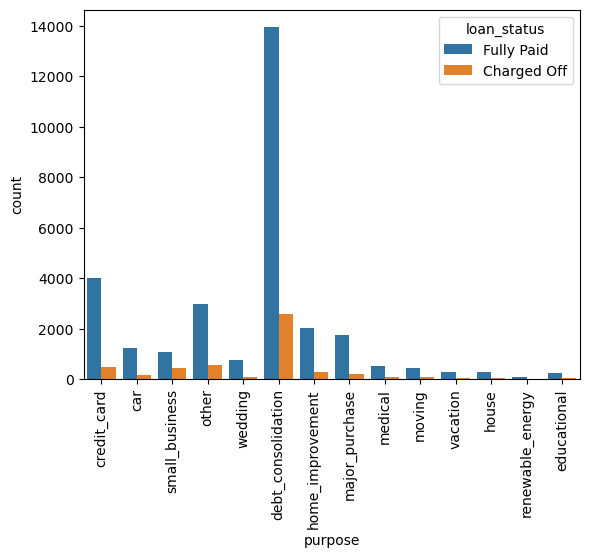

In [219]:
sns.countplot(x='purpose', hue="loan_status", data=loanInfo2)
plt.xticks(rotation=90)
plt.show()

### Most of the loans are given to Debt Consolidation

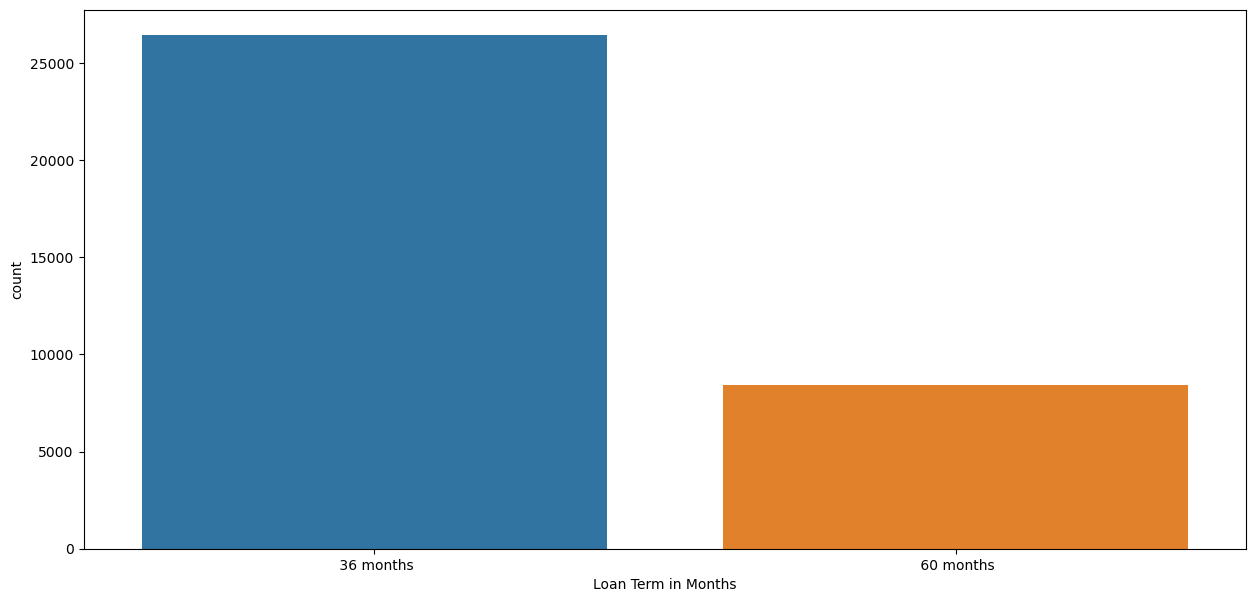

In [222]:
plt.figure(figsize=(15,7))
sns.countplot( x="term", data=loanInfo2)
plt.xlabel('Loan Term in Months')
plt.show()

### Seems that Loans which are 60 months are most defaulters

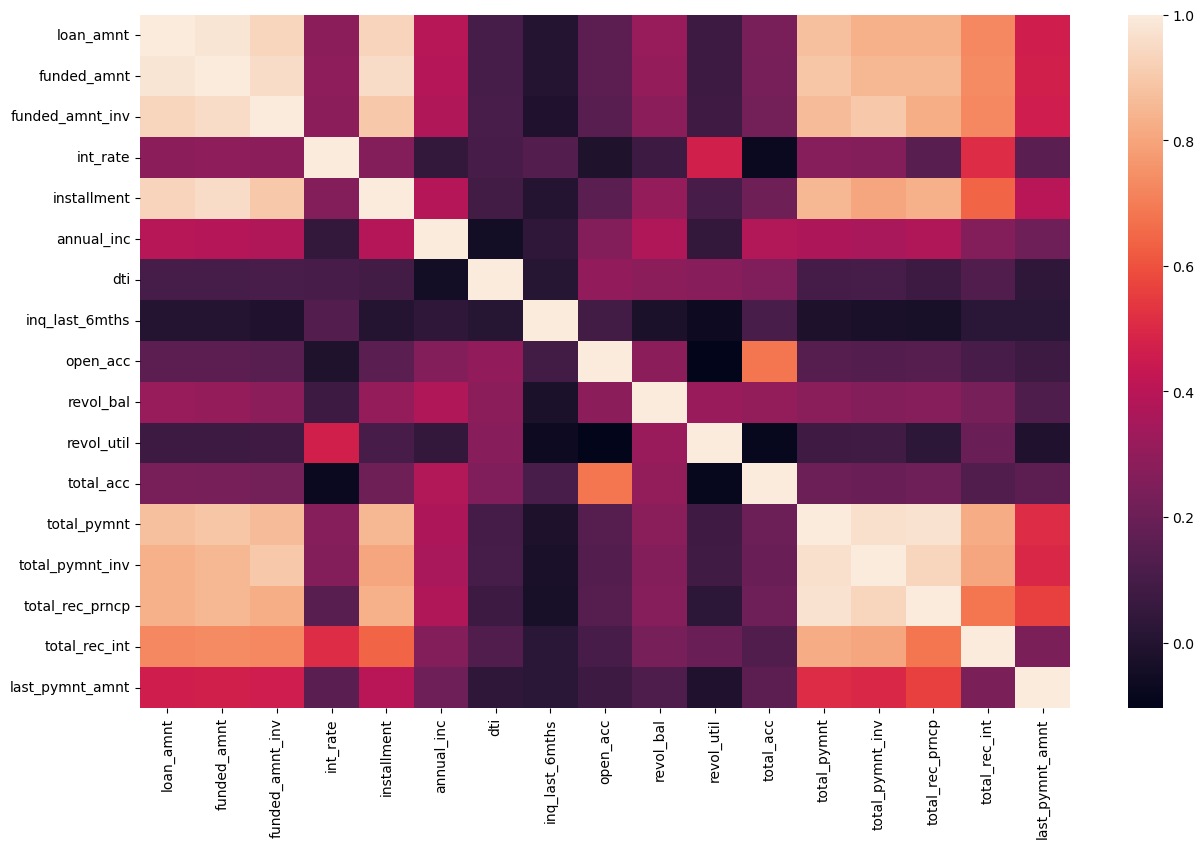

In [225]:
plt.figure(figsize=(15,9))
sns.heatmap(loanInfo2.corr())
plt.show()

### The number of inquiries in past 6 months is strong corelated with many of the items



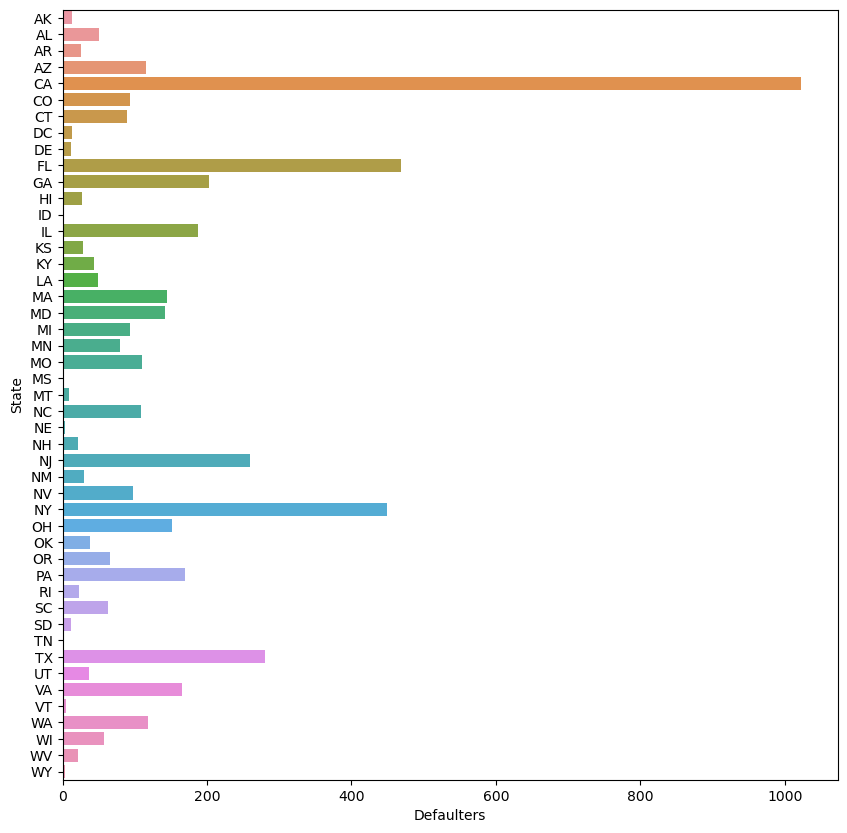

In [227]:
stateGroup = loanInfo2[loanInfo2['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=stateGroup)
plt.xlabel('Defaulters')
plt.ylabel('State')
plt.show()

### CA applicants has more defaulters, FL, NY, TX follows 

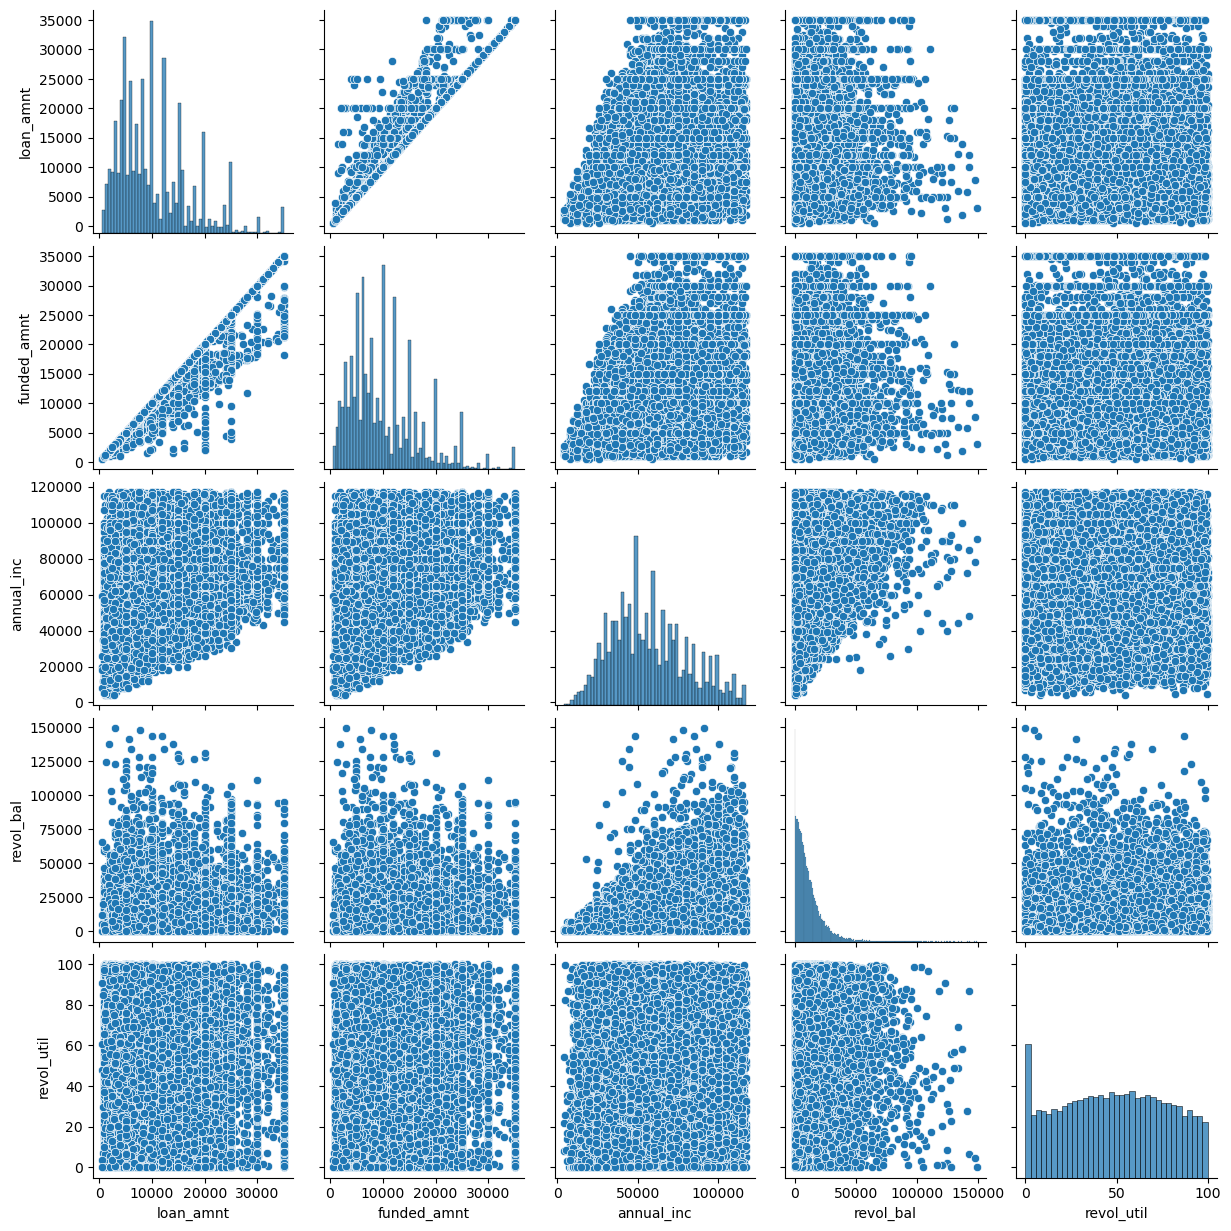

In [233]:
sns.pairplot(loanInfo2[['loan_amnt', 'funded_amnt', 'term','grade','annual_inc','verification_status','earliest_cr_line','revol_bal','revol_util']])
plt.show()



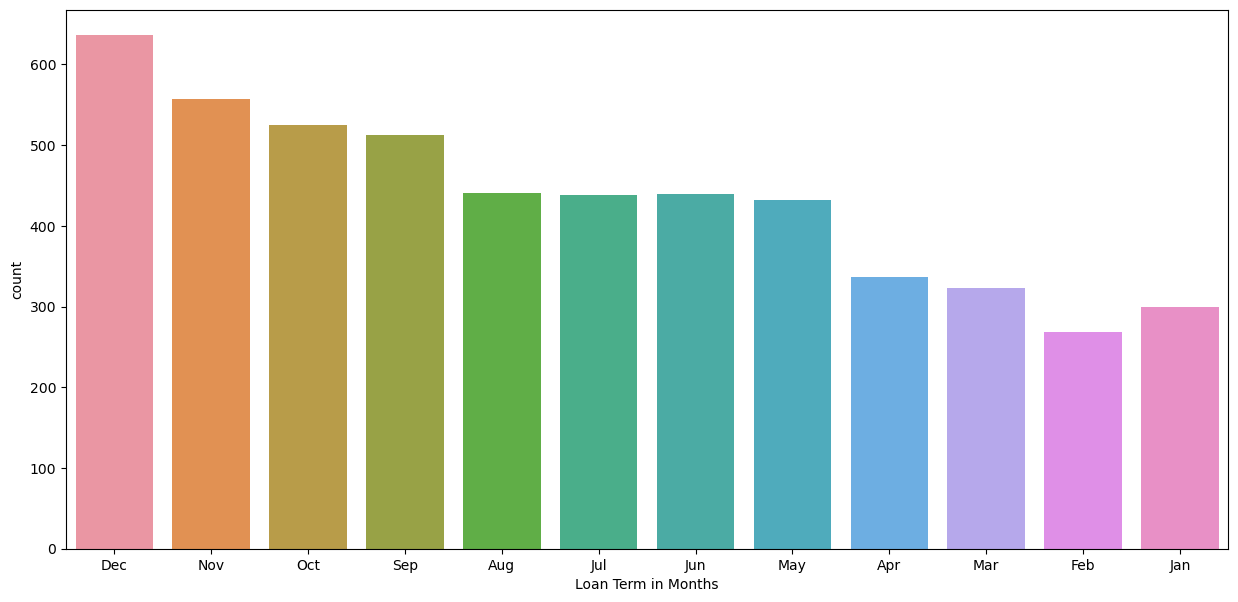

In [242]:


plt.figure(figsize=(15,7))
sns.countplot( x="loan_month", data=loanInfo2[loanInfo2['loan_status']=='Charged Off'])
plt.xlabel('Loan Term in Months')
plt.show()


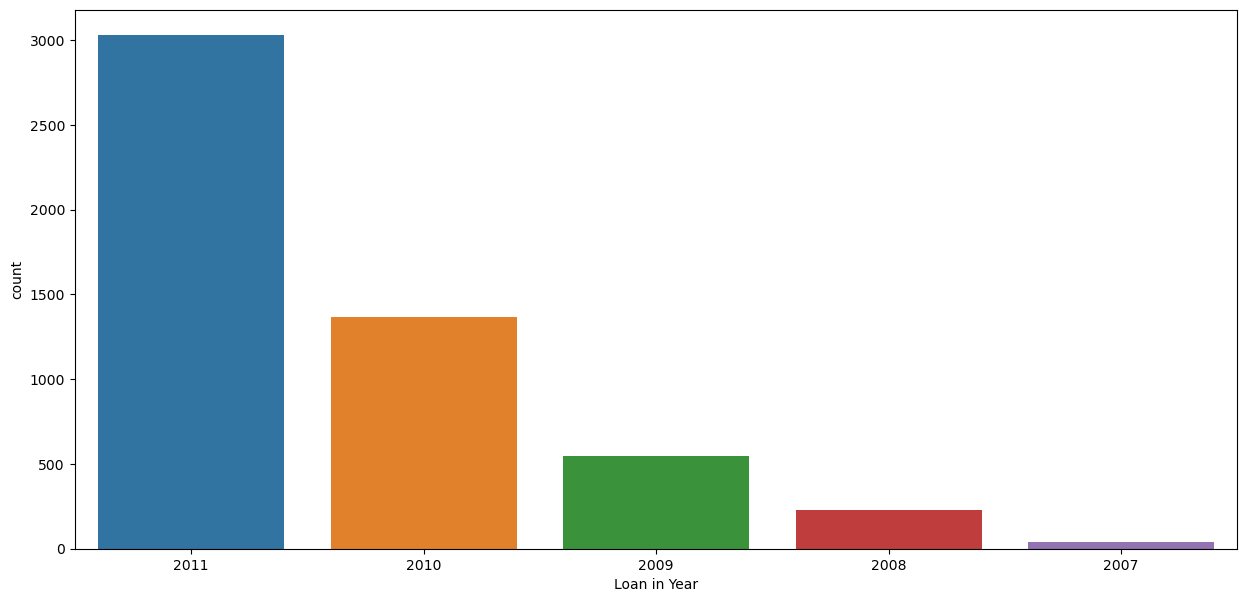

In [243]:
plt.figure(figsize=(15,7))
sns.countplot( x="loan_year", data=loanInfo2[loanInfo2['loan_status']=='Charged Off'])
plt.xlabel('Loan in Year')
plt.show()

## Most defaulters are there for loans which are issued on 2011